In [1]:
import numpy as np
import pandas as pd

In [2]:
DATA_LOC = './data/training.csv'

In [3]:
df = pd.read_csv(DATA_LOC)

In [4]:
df.head()

,geohash6,day,timestamp,demand
0,qp03wc,18,20:0,0.020072
1,qp03pn,10,14:30,0.024721
2,qp09sw,9,6:15,0.102821
3,qp0991,32,5:0,0.088755
4,qp090q,15,4:0,0.074468


In [5]:
df.describe()

,day,demand
count,4.206321e+06,4.206321e+06
mean,3.145299e+01,1.050907e-01
std,1.768278e+01,1.592655e-01
min,1.000000e+00,3.092217e-09
25%,1.600000e+01,1.867379e-02
50%,3.200000e+01,5.043463e-02
75%,4.700000e+01,1.208644e-01
max,6.100000e+01,1.000000e+00


In [6]:
df.isnull().sum()

geohash6     0
day          0
timestamp    0
demand       0
dtype: int64

In [14]:
len(df.geohash6.unique()), len(df.day.unique()), len(df.timestamp.unique())

(1329, 61, 96)

In [15]:
df.timestamp.unique() # 24 * 4 = 96, each is of 15mins gap

array(['20:0', '14:30', '6:15', '5:0', '4:0', '12:15', '3:30', '20:45',
       '22:15', '9:15', '11:45', '14:45', '2:30', '23:45', '11:30',
       '10:0', '11:0', '18:30', '6:0', '13:0', '4:30', '15:30', '4:15',
       '9:0', '0:15', '21:15', '4:45', '12:30', '12:0', '14:15', '9:30',
       '5:15', '3:15', '16:30', '8:0', '11:15', '18:45', '16:0', '2:15',
       '7:0', '18:0', '3:0', '15:0', '22:45', '20:30', '0:30', '13:30',
       '22:0', '5:30', '9:45', '10:30', '17:0', '5:45', '6:30', '23:30',
       '1:15', '0:45', '1:30', '13:45', '12:45', '2:45', '19:15', '14:0',
       '13:15', '15:45', '8:45', '23:15', '16:15', '19:30', '21:30',
       '10:45', '7:15', '7:30', '16:45', '17:15', '23:0', '6:45', '18:15',
       '1:0', '8:15', '17:45', '22:30', '2:0', '1:45', '7:45', '10:15',
       '3:45', '8:30', '15:15', '21:0', '21:45', '19:45', '19:0', '0:0',
       '17:30', '20:15'], dtype=object)

In [17]:
df.geohash6.unique()

array(['qp03wc', 'qp03pn', 'qp09sw', ..., 'qp03yn', 'qp09v9', 'qp0d45'],
      dtype=object)

In [18]:
a_df = df[df.geohash6 == 'qp03wc']

In [22]:
a_df.shape[0]

5815

In [27]:
a_df.shape[0]/96

60.572916666666664

In [33]:
print(np.sort(a_df.day.unique()))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61]


In [34]:
b_df = df[df.geohash6 == 'qp03pn']
b_df.shape[0]

4159

In [35]:
print(np.sort(b_df.day.unique()))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61]


In [37]:
everyday_length = {}
for k in np.sort(b_df.day.unique()):
    everyday_length[k] = b_df[b_df.day == k].shape

In [38]:
everyday_length

{1: (60, 4),
 2: (73, 4),
 3: (71, 4),
 4: (67, 4),
 5: (61, 4),
 6: (65, 4),
 7: (71, 4),
 8: (71, 4),
 9: (71, 4),
 10: (77, 4),
 11: (73, 4),
 12: (65, 4),
 13: (59, 4),
 14: (56, 4),
 15: (71, 4),
 16: (70, 4),
 17: (73, 4),
 18: (53, 4),
 19: (65, 4),
 20: (62, 4),
 21: (73, 4),
 22: (71, 4),
 23: (68, 4),
 24: (73, 4),
 25: (68, 4),
 26: (59, 4),
 27: (65, 4),
 28: (69, 4),
 29: (75, 4),
 30: (71, 4),
 31: (70, 4),
 32: (73, 4),
 33: (61, 4),
 34: (62, 4),
 35: (69, 4),
 36: (69, 4),
 37: (80, 4),
 38: (72, 4),
 39: (80, 4),
 40: (69, 4),
 41: (54, 4),
 42: (67, 4),
 43: (62, 4),
 44: (74, 4),
 45: (70, 4),
 46: (65, 4),
 47: (63, 4),
 48: (62, 4),
 49: (74, 4),
 50: (76, 4),
 51: (70, 4),
 52: (73, 4),
 53: (71, 4),
 54: (66, 4),
 55: (65, 4),
 56: (67, 4),
 57: (69, 4),
 58: (72, 4),
 59: (73, 4),
 60: (71, 4),
 61: (64, 4)}

In [39]:
b1_df = b_df[b_df.day == 1]

In [44]:
b1_df.timestamp.unique()

array(['15:15', '13:30', '2:15', '13:15', '10:15', '8:30', '1:45', '9:45',
       '7:45', '2:0', '12:0', '0:15', '1:15', '9:30', '7:15', '9:0',
       '11:30', '14:0', '9:15', '6:15', '5:30', '0:45', '8:15', '6:45',
       '13:45', '3:15', '15:30', '6:30', '23:45', '11:15', '10:0', '4:30',
       '3:30', '13:0', '8:0', '22:45', '15:45', '11:0', '6:0', '2:30',
       '1:30', '4:15', '5:15', '12:15', '3:45', '14:15', '8:45', '4:45',
       '14:45', '3:0', '4:0', '5:45', '10:30', '1:0', '7:30', '23:30',
       '0:30', '23:0', '11:45', '15:0'], dtype=object)

In [45]:
len(b1_df.timestamp.unique())

60

In [46]:
for k in df.timestamp.unique():
    if k not in b1_df.timestamp.unique():
        print(k)

20:0
14:30
5:0
20:45
22:15
18:30
21:15
12:30
16:30
18:45
16:0
7:0
18:0
20:30
22:0
17:0
12:45
2:45
19:15
23:15
16:15
19:30
21:30
10:45
16:45
17:15
18:15
17:45
22:30
21:0
21:45
19:45
19:0
0:0
17:30
20:15


In [49]:
df.demand.describe()

count    4.206321e+06
mean     1.050907e-01
std      1.592655e-01
min      3.092217e-09
25%      1.867379e-02
50%      5.043463e-02
75%      1.208644e-01
max      1.000000e+00
Name: demand, dtype: float64

In [57]:
len(df[df.demand == 1].geohash6.unique())

105

In [65]:
b1_df[b1_df.timestamp == '15:45'].demand.values

array([0.00996424])

In [67]:
b1_df[b1_df.timestamp == '22:45'].demand.values

array([0.01186857])

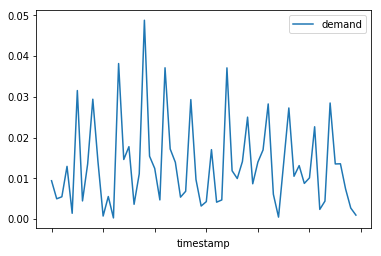

In [70]:
b1_df.plot(x='timestamp', y='demand')